In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py

[1.62021666e+02 2.69030251e+01 8.59756630e+00 4.11044115e+00
 2.29693954e+00 1.37849755e+00 8.95536627e-01 6.51351912e-01
 4.64234234e-01 3.55966156e-01 2.63174963e-01 1.86253083e-01
 1.46356949e-01 1.24050866e-01 9.18818536e-02 7.56877260e-02
 5.18417610e-02 5.18417610e-02 4.15243365e-02 4.15243365e-02]
[1.62027132e+02 2.69392964e+01 8.64638559e+00 4.15192348e+00
 2.32594115e+00 1.39977021e+00 9.09369667e-01 6.60439464e-01
 4.71451074e-01 3.60832810e-01 2.66102704e-01 1.88120584e-01
 1.47568452e-01 1.25055647e-01 9.25183760e-02 7.61167726e-02
 5.21265869e-02 5.21265869e-02 4.16897417e-02 4.16897417e-02]


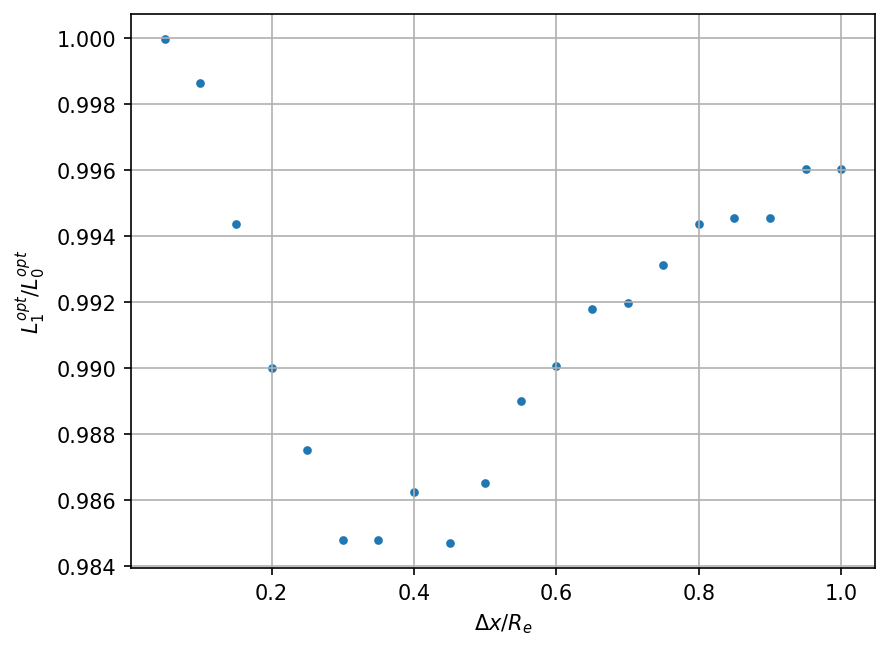

In [4]:


coordfile='no_sa/coord.h5'

with h5py.File(coordfile, 'r') as f:
    umbrella_field = np.array(f["umbrella_field"])
    lxyz=np.array(f["parameter/lxyz"])
ntarget=len(umbrella_field[umbrella_field>-1])
dx=np.loadtxt("no_sa/dx.csv")
#number of different parameters
n_param=len(dx)
opt_sa_exp=np.loadtxt(f"sa_exp/opt.csv")/ntarget
#number of simulations per parameter
n_sim=int(len(opt_sa_exp)/n_param)

opt_no_sa=np.loadtxt("no_sa/opt.csv")/ntarget
#reshape arrays
opt_sa_exp=opt_sa_exp.reshape(n_param,n_sim).mean(axis=1)
opt_no_sa=opt_no_sa.reshape(n_param,n_sim).mean(axis=1)
print(opt_sa_exp)
print(opt_no_sa)
plt.figure(dpi=150)
plt.grid()
plt.xlabel("$\Delta x/R_e$")
plt.ylabel(r"$L^{opt}_1/L^{opt}_0$")
plt.scatter(dx,opt_sa_exp/opt_no_sa,s=10)
plt.savefig("opt_checker_Nbar50.pdf")